In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn.apionly as sns
import warnings

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tableau10 = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
for i in range(len(tableau10)):  
    r, g, b = tableau10[i]  
    tableau10[i] = (r / 255., g / 255., b / 255.)
    
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
# plt.rcParams['font.serif'] = 'Arial'
# plt.rcParams['font.family'] = "sans-serif"
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.prop_cycle'] = cycler('color',tableau20)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['grid.alpha'] = .5
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['hist.bins'] = 100
plt.rcParams['legend.fontsize'] = 16

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
compliance = {2010: 10329, 
              2011: 12403, 
              2012: 13380, 
              2013: 13138, 
              2014: 13052, 
              2015: 13828, 
              2016: 15480}

In [5]:
ll84 = pd.read_csv(r'..\data\LL84_2011_bbl_eui_flagged.csv')

eui = ll84['Weather Normalized Site EUI (kBtu/Sq Ft)']
eui = eui[(eui>0)]
logeui = np.log(eui)
tmpeui = eui[(eui>0)&(eui<1000)]
clean = eui[(logeui>np.mean(logeui) - np.std(logeui)*2)&
        (logeui<np.mean(logeui) + np.std(logeui)*2)]

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,20,57,64,66,93,176,177,196) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Site EUI over time

In [9]:
feats = ['BBL10_2011', 'Total_Floor_Space_Sq_Ft_2011', 'Facility_Type_2011', 
         'Service_and_Product_Provider_2011', 'Metering_Configuration_2011', 'Current_Rating_1_100_2011',
         'Current_Total_GHG_Emissions_MtCO2e_2011', 'Current_Total_Site_Energy_Use_kBtu_2011', 'Weather_Normalized_Site_EUI_kBtu/Sq_Ft_2011', 
         'Electricity_Use_kBtu_2011','Natural_Gas_Use_kBtu_2011', 'District_Steam_Use_kBtu_2011', 
         'Fuel_Oil_2_Use_kBtu_2011','Fuel_Oil_4_Use_kBtu_2011', 'Fuel_Oil_56_Use_kBtu_2011',
         'Current_Weather_Normalized_Source_Energy_Intensity_kBtu/Sq_Ft_2011','Multifamily_Home__Laundry_in_common_area_2011','Multifamily_Home__Laundry_in_each_unit_2011',
         'Multifamily_Home__Government_Subsidized_Housing?_Y=1__N=0_2011', 'Multifamily_Home__Number_of_units_2011', 'Office__PC_Density_2011', 
         'Office__Weekly_operating_hours_2011','Office__Workers_Density_2011','Total_GHG_Emissions_MtCO2e_2012',
         'Weather_Normalized_Site_EUI_kBtu/ft_2_2012','Weather_Normalized_Source_EUI_kBtu/ft_2_2012', 'Weather_Normalized_Site_EUI_kBtu/ft_2_2013', 
         'Weather_Normalized_Source_EUI_kBtu/ft_2_2013', 'Total_GHG_Emissions_Metric_Tons_CO2e_2013','Weather_Normalized_Site_EUI_kBtu/ft_2_2014',
         'Weather_Normalized_Source_EUI_kBtu/ft_2_2014', 'Total_GHG_Emissions_Metric_Tons_CO2e_2014','Weather_Normalized_Site_EUI_kBtu/ft_2_2015', 
         'Weather_Normalized_Source_EUI_kBtu/ft_2_2015', 'Total_GHG_Emissions_Metric_Tons_CO2e_2015', 
         'ENERGY_STAR_Score_2016', 'Weather_Normalized_Site_EUI_kBtu/ft_2_2016', 'Site_Energy_Use_kBtu_2016',
         'Weather_Normalized_Source_EUI_kBtu/ft_2_2016','Fuel_Oil_#2_Use_kBtu_2016', 'Fuel_Oil_#4_Use_kBtu_2016', 'Fuel_Oil_#5_&_6_Use_kBtu_2016', 
         'District_Steam_Use_kBtu_2016', 'Natural_Gas_Use_kBtu_2016','Electricity_Use___Grid_Purchase_kBtu_2016',
         'Total_GHG_Emissions_Metric_Tons_CO2e_2016', 'Data_Center___Gross_Floor_Area_ft_2_2016', 'Multifamily_Housing___Number_of_Laundry_Hookups_in_All_Units_2016',
         'Multifamily_Housing___Number_of_Laundry_Hookups_in_Common_Areas_2016','Multifamily_Housing___Total_Number_of_Residential_Living_Units_2016', 'Office___Number_of_Workers_on_Main_Shift_2016', 
         'Office___Weekly_Operating_Hours_2016', 'Office___Worker_Density_Number_per_1_000_ft_2_2016',
         'Organization_2016','Borough','ZipCode', 'BldgArea','NumFloors', 'AssessLand','AssessTot','YearBuilt', 'BuiltFAR', 'XCoord','YCoord']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load LL84 data
df = pd.read_csv('..\data\ll84_11_16_BBL_BIN_pluto_v2.csv', usecols=feats)

# rename columns
new_cols = ['BBL', 'area', 'FacilityType', 'provider', 'meter', 'ess11', 'ghg11', 'totener11', 'site11','ElecUse11',
            'NGUse11','SteamUse11', 'fuel211','fuel411','fuel5611', 'eui11','comLaund11','unitLaund11','GovSubsidized','units11',
            'pcdens11', 'ophours11','workdens11', 'ghg12', 'site12', 'eui12', 'site13', 'eui13', 'ghg13', 'site14', 
            'eui14', 'ghg14', 'site15', 'eui15', 'ghg15', 'ess16', 'site16', 'totener16','eui16',
            'fuel216', 'fuel416', 'fuel5616', 'SteamUse16', 'NGUse16','ElecUse16', 'ghg16', 'dataCenterArea','unitLaund16','comLaund16',
            'units16','workers16', 'ophours16', 'workdens16', 'organization','Borough', 'ZipCode', 'BldgArea', 'NumFloors', 
            'AssessLand', 'AssessTot', 'YearBuilt', 'BuiltFAR', 'XCoord','YCoord'] 

df.columns = new_cols

df = df[df.YearBuilt > 1800]

# Convert EUI
df.site11 = df.site11 * 3.1545913 # kWh/m2
df.site12 = df.site12 * 3.1545913
df.site13 = df.site13 * 3.1545913
df.site14 = df.site14 * 3.1545913
df.site15 = df.site15 * 3.1545913
df.site16 = df.site16 * 3.1545913

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1693,1692) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
siteOf = df[['site11', 'site12', 'site13', 'site14', 'site15', 'site16']][df.FacilityType == 'Office']
siteOf = np.array(siteOf)

siteMf = df[['site11', 'site12', 'site13', 'site14', 'site15', 'site16']][df.FacilityType == 'Multifamily Housing']
siteMf = np.array(siteMf)

## Fuel mix over time

In [11]:
df = df[(df.FacilityType == 'Multifamily Housing')|(df.FacilityType == 'Office')]

## Area plots for fuel

In [12]:
fuelCols=['Facility_Type_2011',
 'Electricity_Use_kBtu_2011','Natural_Gas_Use_kBtu_2011', 'District_Steam_Use_kBtu_2011', 'Fuel_Oil_2_Use_kBtu_2011','Fuel_Oil_4_Use_kBtu_2011', 'Fuel_Oil_56_Use_kBtu_2011', 
 'Electricity_Use___Grid_Purchase_kBtu_2012', 'Natural_Gas_Use_kBtu_2012', 'District_Steam_Use_kBtu_2012', 'Fuel_Oil_#2_Use_kBtu_2012', 'Fuel_Oil_#4_Use_kBtu_2012', 'Fuel_Oil_#5_&_6_Use_kBtu_2012',
 'Natural_Gas_Use_kBtu_2013', 'Fuel_Oil_#2_Use_kBtu_2013', 'Fuel_Oil_#4_Use_kBtu_2013', 'Fuel_Oil_#5_&_6_Use_kBtu_2013','District_Steam_Use_kBtu_2013', 'Electricity_Use___Grid_Purchase_kBtu_2013', 
'Fuel_Oil_#2_Use_kBtu_2014', 'Fuel_Oil_#4_Use_kBtu_2014', 'Fuel_Oil_#5_&_6_Use_kBtu_2014', 'District_Steam_Use_kBtu_2014', 'Natural_Gas_Use_kBtu_2014', 'Electricity_Use___Grid_Purchase_kBtu_2014', 
 'Fuel_Oil_#2_Use_kBtu_2015', 'Fuel_Oil_#4_Use_kBtu_2015', 'Fuel_Oil_#5_&_6_Use_kBtu_2015', 'District_Steam_Use_kBtu_2015', 'Natural_Gas_Use_kBtu_2015', 'Electricity_Use___Grid_Purchase_kBtu_2015', 
  'Fuel_Oil_#2_Use_kBtu_2016', 'Fuel_Oil_#4_Use_kBtu_2016', 'Fuel_Oil_#5_&_6_Use_kBtu_2016','District_Steam_Use_kBtu_2016','Natural_Gas_Use_kBtu_2016', 'Electricity_Use___Grid_Purchase_kBtu_2016']

names = ['FacilityType', 'elec_11','ng_11', 'steam_11', 'fuel2_11','fuel4_11', 'fuel56_11', 
 'elec_12', 'ng_12', 'steam_12', 'fuel2_12', 'fuel4_12', 'fuel56_12',
 'ng_13', 'fuel2_13', 'fuel4_13', 'fuel56_13','steam_13', 'elec_13', 
'fuel2_14', 'fuel4_14', 'fuel56_14', 'steam_14', 'ng_14', 'elec_14', 
 'fuel2_15', 'fuel4_15', 'fuel56_15', 'steam_15', 'ng_15', 'elec_15', 
  'fuel2_16', 'fuel4_16', 'fuel56_16','steam_16','ng_16', 'elec_16']

fuels = pd.read_csv(r'../data/ll84_11_16_BBL_BIN_pluto_v2.csv', usecols=fuelCols)

fuels.columns = names

fuels = fuels[(fuels.FacilityType == 'Multifamily Housing')|(fuels.FacilityType == 'Office')]

In [13]:
fuels.head()

,FacilityType,elec_11,ng_11,steam_11,fuel2_11,fuel4_11,fuel56_11,elec_12,ng_12,steam_12,fuel2_12,fuel4_12,fuel56_12,ng_13,fuel2_13,fuel4_13,fuel56_13,steam_13,elec_13,fuel2_14,fuel4_14,fuel56_14,steam_14,ng_14,elec_14,fuel2_15,fuel4_15,fuel56_15,steam_15,ng_15,elec_15,fuel2_16,fuel4_16,fuel56_16,steam_16,ng_16,elec_16
0,Office,1.425851e+08,2999521.70,30687701.52,NaN,NaN,NaN,1.140540e+08,2904730.11,25797034.02,NaN,NaN,NaN,2780984.6,NaN,NaN,NaN,34092932.9,113311844.9,NaN,NaN,NaN,34553975.8,7639856.0,129289585.5,NaN,NaN,NaN,31855867.4,8140862.1,124756980.8,NaN,NaN,NaN,16494141.4,6754889.4,114846869.6
1,Office,4.188982e+07,1006809.09,12206440.27,NaN,NaN,NaN,3.995562e+07,957217.44,10628417.63,NaN,NaN,NaN,1236607.8,NaN,NaN,NaN,13241323.5,38914187.5,NaN,NaN,NaN,14138640.6,316087.1,36131906.4,NaN,NaN,NaN,13956696.2,336136.1,34115612.4,NaN,NaN,NaN,12965064.6,402569.7,33952725.6
2,Office,2.278520e+07,NaN,19265412.62,NaN,NaN,NaN,2.120300e+07,NaN,14422886.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15534424.9,19421759.0,NaN,NaN,NaN,16346465.8,NaN,17350429.2,NaN,NaN,NaN,17937480.1,NaN,17557115.2,NaN,NaN,NaN,15932161.2,NaN,18002567.2
5,Office,1.690559e+08,2407263.94,52229382.34,NaN,NaN,NaN,1.594898e+08,2474473.53,43101588.77,NaN,NaN,NaN,2485308.6,NaN,NaN,NaN,52712910.1,150082425.9,NaN,NaN,NaN,59387808.8,3071700.1,143852603.5,NaN,NaN,NaN,55597129.0,6408658.0,151676117.9,NaN,NaN,NaN,48733323.2,6536278.6,141424031.9
6,Office,3.244174e+06,NaN,1540456.43,NaN,NaN,NaN,3.410080e+06,NaN,951405.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1783622.5,3212557.4,NaN,NaN,NaN,2420107.5,NaN,3134114.7,NaN,NaN,NaN,2268703.8,NaN,3087859.7,NaN,NaN,NaN,2288280.4,27625.0,2021848.8


In [14]:
def getFuelRatios(year):
    fuelSummary = fuels.agg({'elec_'+str(year):np.sum,
                            'steam_'+str(year):np.sum,
                            'ng_'+str(year):np.sum,
                            'fuel2_'+str(year):np.sum,
                            'fuel4_'+str(year):np.sum,
                            'fuel56_'+str(year):np.sum})

    ratios = 100*fuelSummary.apply(lambda y: y/fuelSummary.sum())
    ratios = ratios.sort_index()
    cols = ratios.index.tolist()
    
    ratios.index = ['Electricity', 'Fuel oil #2','Fuel oil #4', 'Fuel oil #5&6',  'Natural gas', 'Distric steam']
    ratios = ratios.iloc[::-1]
    ratios = pd.DataFrame([ratios[0:6].values], columns=list(ratios.index))
    
    return ratios

In [15]:
ratios = pd.DataFrame({'2011':getFuelRatios(11).values[0],
                      '2012':getFuelRatios(12).values[0],
                      '2013':getFuelRatios(13).values[0],
                      '2014':getFuelRatios(14).values[0],
                      '2015':getFuelRatios(15).values[0],
                      '2016':getFuelRatios(16).values[0]})

ratios.index = getFuelRatios(11).columns

In [16]:
ratios = ratios.sort_values('2011', ascending=False)
ratios

,2011,2012,2013,2014,2015,2016
Electricity,37.531460,39.049154,36.357456,34.605486,35.375343,36.234381
Natural gas,26.188220,29.167705,32.134589,35.071245,36.843356,40.366437
Fuel oil #5&6,17.902685,13.990067,9.872762,5.740809,1.849560,0.869543
Distric steam,12.883069,11.955410,12.980505,12.980666,13.257234,12.661577
Fuel oil #4,3.331080,3.173666,4.520544,5.868041,6.053405,4.983449
Fuel oil #2,2.163487,2.663999,4.134144,5.733753,6.621102,4.884613


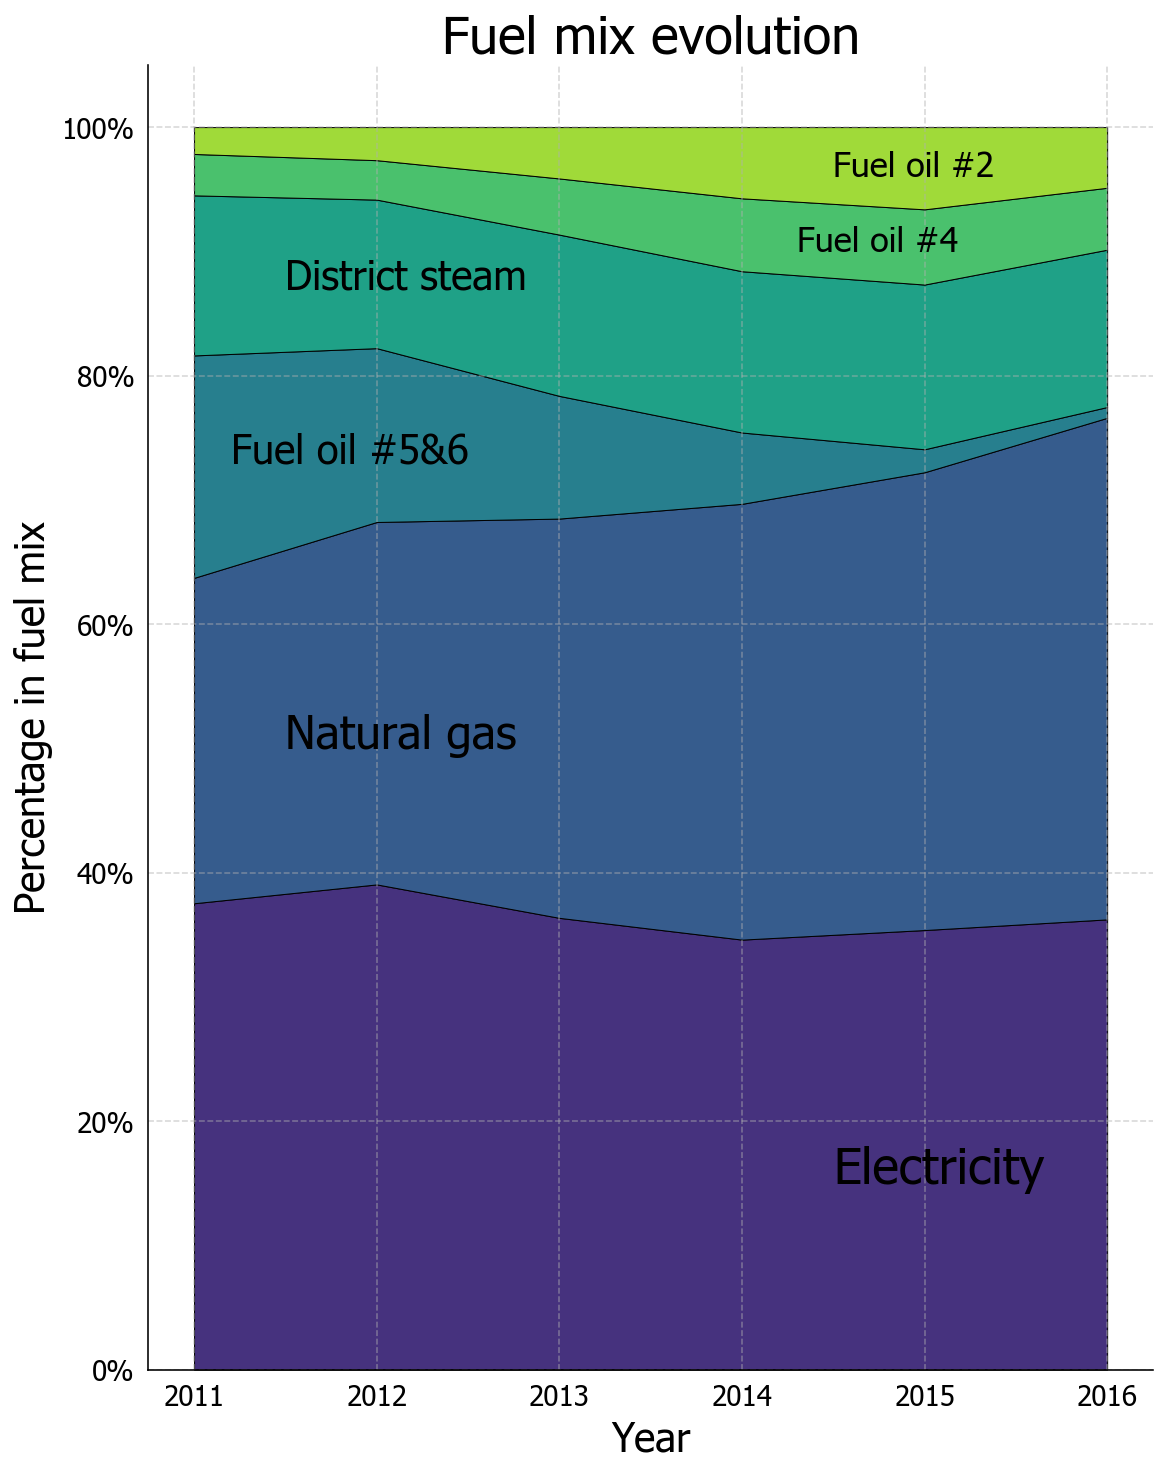

In [17]:
fig = plt.figure(figsize=(9,12))
ax = fig.add_subplot(111)

ax.stackplot(range(6), ratios,baseline="zero", colors=sns.color_palette('viridis'),linewidth=0.5, edgecolor='black',
            labels=ratios.index.values)
plt.xticks(range(6), ['2011', '2012', '2013', '2014', '2015', '2016'])
plt.yticks(range(0, 120, 20), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.text(3.5,15,'Electricity', size=25)
plt.text(0.5,50,'Natural gas', size=23)
plt.text(0.2,73,'Fuel oil #5&6', size=20)
plt.text(0.5,87,'District steam', size=20)
plt.text(3.3,90,'Fuel oil #4', size=17)
plt.text(3.5,96,'Fuel oil #2', size=17)
plt.grid('on', alpha=.5)
plt.tick_params(axis='both',bottom='off',top='off',left='off',right='off')
plt.title('Fuel mix evolution')
plt.ylabel('Percentage in fuel mix')
plt.xlabel('Year')
#plt.legend(bbox_to_anchor=(1.2, 1.0))
#plt.savefig(r'..\output\fuelMix.png', bbox_inches='tight',dpi=550)
plt.show()

## Cleaning methods

In [18]:
ll84 = pd.read_csv(r'..\data\LL84_2011_bbl_eui_flagged.csv')

eui = ll84['Weather Normalized Site EUI (kBtu/Sq Ft)']
eui = eui[(eui>0)]
eui = eui * 3.1545913
logeui = np.log(eui)
tmpeui = eui[(eui>0)&(eui<3200)]
clean = eui[(logeui>np.mean(logeui) - np.std(logeui)*2)&
        (logeui<np.mean(logeui) + np.std(logeui)*2)]

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,20,57,64,66,93,176,177,196) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


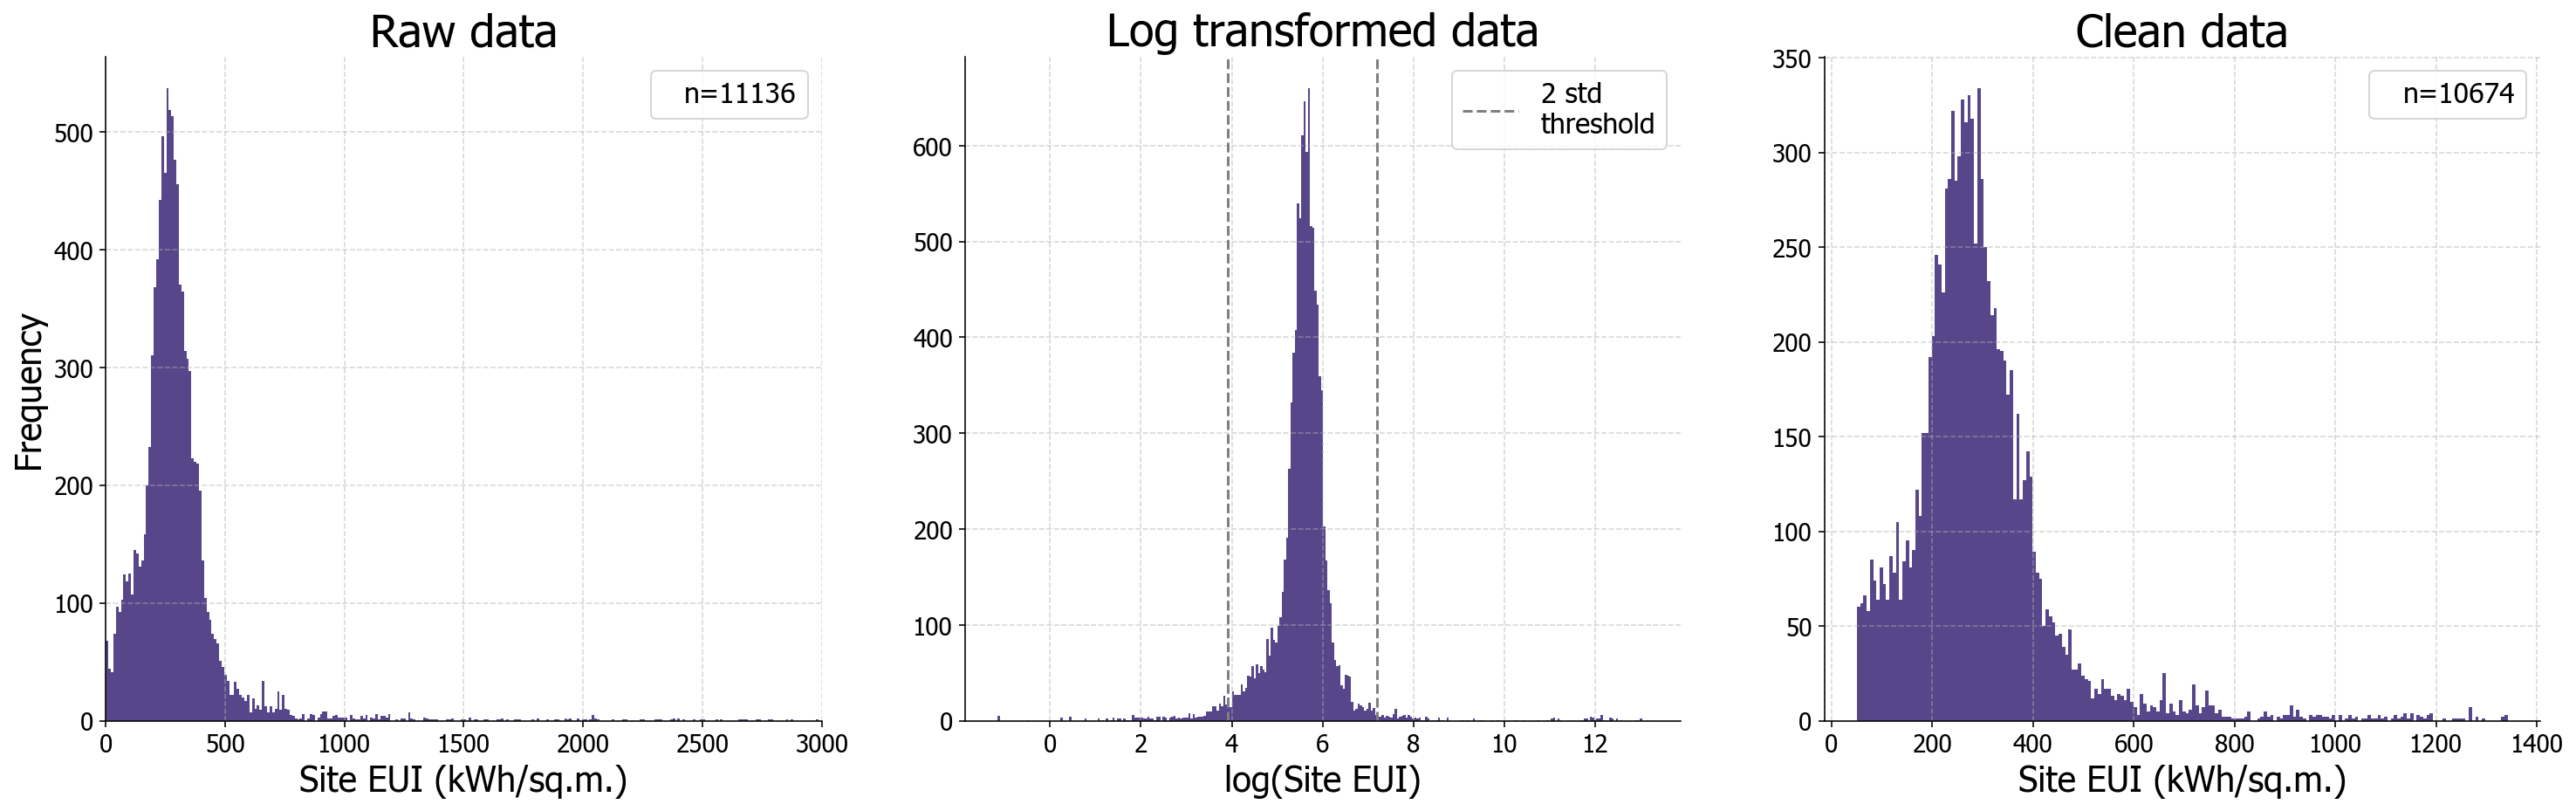

In [19]:
plt.figure(figsize=(25,7))
plt.subplot(131)
plt.hist(tmpeui, bins=300, color=sns.color_palette("viridis")[0], alpha=.9, label='n=%i' %len(eui))
plt.grid(ls='--',alpha=0.5)
plt.xlim(0,3000)
plt.xlabel('Site EUI (kWh/sq.m.)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Raw data', size=26)
plt.legend(handlelength=0, frameon=True, fontsize=16)
plt.subplot(132)
plt.hist(logeui,bins=300, color=sns.color_palette("viridis")[0], alpha=0.9)
plt.grid(ls='--',alpha=0.5)
plt.axvline(np.mean(logeui) - np.std(logeui)*2, color='gray', ls='--', label='2 std\nthreshold')
plt.axvline(np.mean(logeui) + np.std(logeui)*2, color='gray', ls='--')
plt.xlabel('log(Site EUI)', size=20)
#plt.ylabel('Frequency')
plt.title('Log transformed data', size=26)
plt.legend(frameon=True, fontsize=16)
plt.subplot(133)
plt.hist(clean, bins=200, color=sns.color_palette("viridis")[0], alpha=.9, label='n=%i' %len(clean))
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Site EUI (kWh/sq.m.)', size=20)
#plt.ylabel('Frequency')
plt.title('Clean data', size=26)
plt.legend(handlelength=0, frameon=True, fontsize=16)
#plt.savefig(r'..\output\cleaningProcess.png', bbox_inches='tight',dpi=550)
plt.show()

## Site EUI descriptives

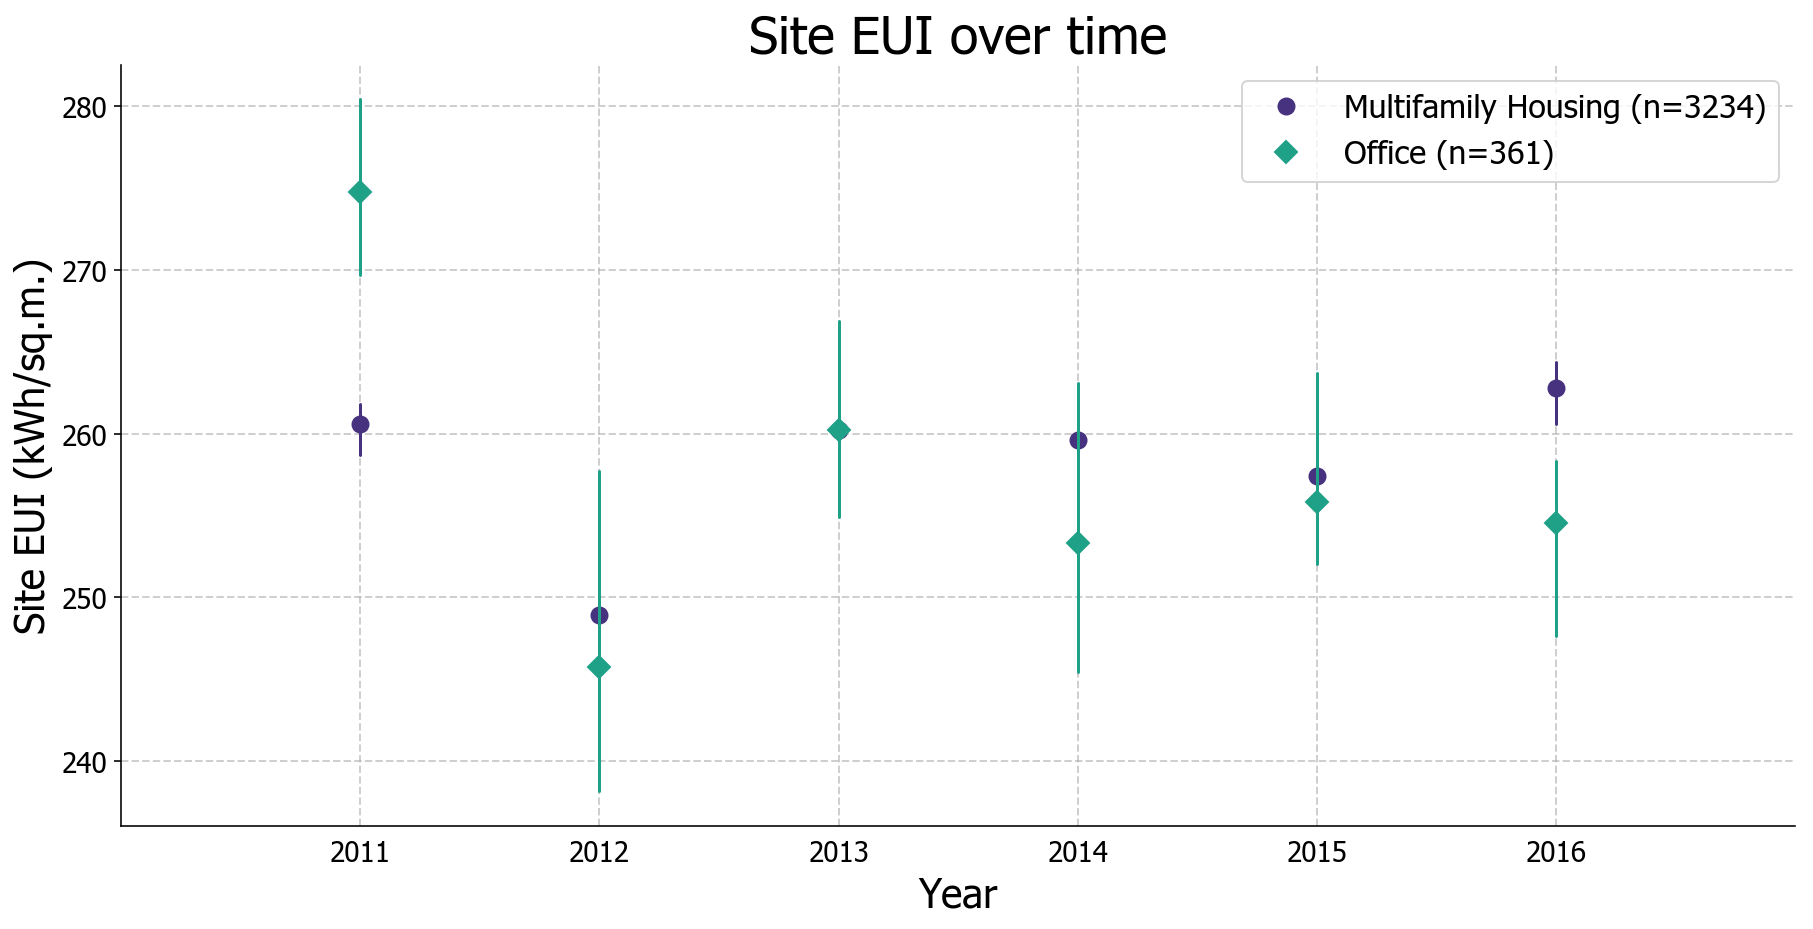

In [20]:
plt.figure(figsize=(15,7))
sns.tsplot(data=siteMf, err_style="ci_bars", estimator=np.median, interpolate=False, color=sns.color_palette("viridis")[0],
           legend=True, condition='Multifamily Housing (n=%i)'%len(siteMf), marker="o", markersize=8)
sns.tsplot(data=siteOf, err_style="ci_bars", estimator=np.median, interpolate=False, color=sns.color_palette("viridis")[3], 
           legend=True, condition='Office (n=%i)'%len(siteOf), marker="D", markersize=8)
plt.tick_params(axis='both',bottom='off',top='off',left='on',right='off')
plt.xticks(range(6), ['2011', '2012', '2013', '2014', '2015', '2016'])
plt.ylabel('Site EUI (kWh/sq.m.)')
plt.xlabel('Year')
plt.title("Site EUI over time")
plt.grid(True,ls='--',lw=1, alpha=0.6)
plt.legend(fontsize=16, frameon=True)
#plt.savefig(r'..\output\descEUIovertime.png', bbox_inches='tight',dpi=550)
plt.show()

## LL84 compliance

In [21]:
reported = []
clean = []
uniqueReported = []

for year in range(2010, 2017):
    #globals()['df'+str(year)] 
    tmp = pd.read_csv(r'..\LL84_'+str(year)+'_bbl_eui_flagged.csv')
    uniqueReported.append(len(tmp.new_bbl.unique()))
    reported.append(len(tmp))
    clean.append(len(tmp[(tmp.dup_ID==0) & (tmp.parent==0) & (tmp.missing_bbl==0) & (tmp.multiple_bbl==0) & (tmp.dup_bbl_bin==0) 
        & (tmp.Occ_0==0) & (tmp['EUI_0']==0) & (tmp['EUI_2std']==0) & (tmp['missing_EUI']==0)]))

C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (64,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,29,121,130,131,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,22,26,129,132,147,154,155,159,237) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sp4356\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Colu

In [22]:
uniqueReported

[8282, 11478, 12038, 12081, 12306, 12828, 12403]

In [23]:
reported

[10329, 12403, 13380, 13138, 13052, 13828, 13137]

In [24]:
clean

[8435, 10343, 11242, 9175, 9387, 10867, 10784]

In [25]:
compl = pd.read_csv(r'..\data\ll84Compliance.csv')
compl['nonCompliance'] = 100 - compl.compilance_rate
compl

,Unnamed: 0,NO_covered,NO_complied,compilance_rate,nonCompliance
0,2010,13961,7749,55.504620,44.495380
1,2011,13258,9911,74.754865,25.245135
2,2012,13196,10612,80.418309,19.581691
3,2013,12973,10533,81.191706,18.808294
4,2014,13678,11196,81.854072,18.145928
5,2015,12627,11366,90.013463,9.986537
6,2016,12627,12403,98.226023,1.773977


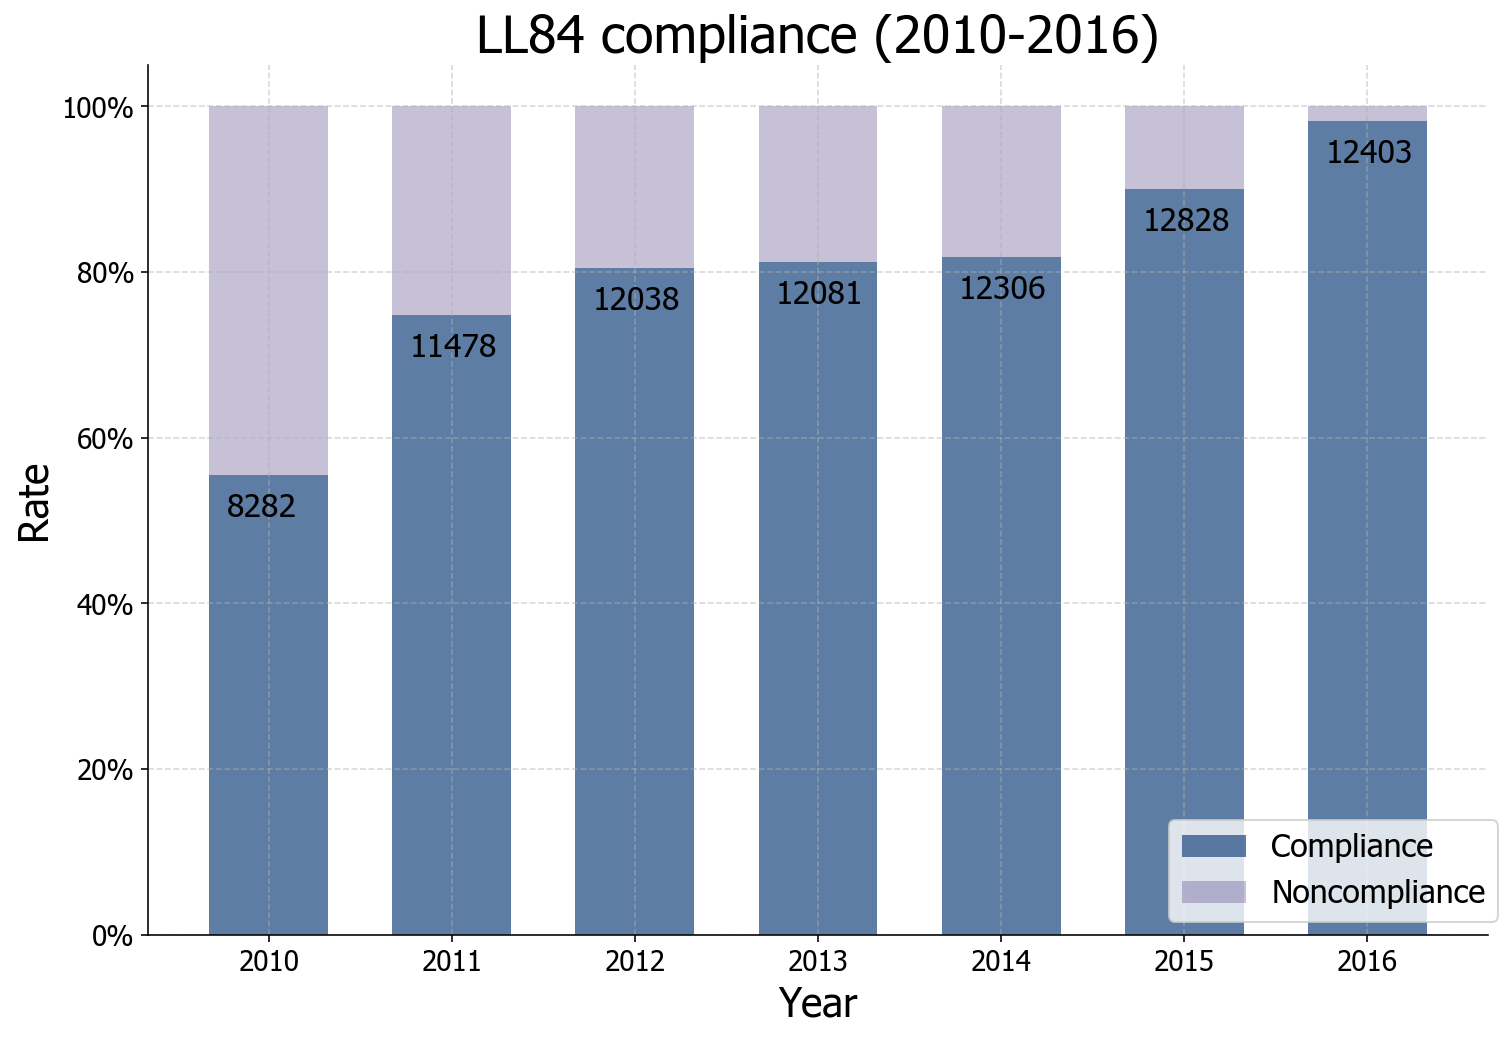

In [26]:
width = .65
p1 = plt.bar(np.arange(7), compl.compilance_rate.values, width, color=sns.color_palette("viridis")[1], alpha=0.8)
p2 = plt.bar(np.arange(7), compl.nonCompliance, width,
             bottom=compl.compilance_rate.values, color=sns.color_palette("viridis")[0], alpha=0.3)

plt.ylabel('Rate',size=20)
plt.xlabel('Year',size=20)
plt.title('LL84 compliance (2010-2016)', size=26)

for i in range(7):
    plt.text(i-.23, compl.compilance_rate.values[i]-5, str(uniqueReported[i]), size=16)
    
plt.xticks(np.arange(7), ('2010', '2011', '2012', '2013', '2014', '2015', '2016'))
plt.yticks(range(0, 120, 20), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend((p1[0], p2[0]), ('Compliance', 'Noncompliance'), frameon=True, bbox_to_anchor=(0.75, 0.15))
#plt.savefig(r'..\output\ll84Compliance.png', bbox_inches='tight',dpi=550)
plt.show()

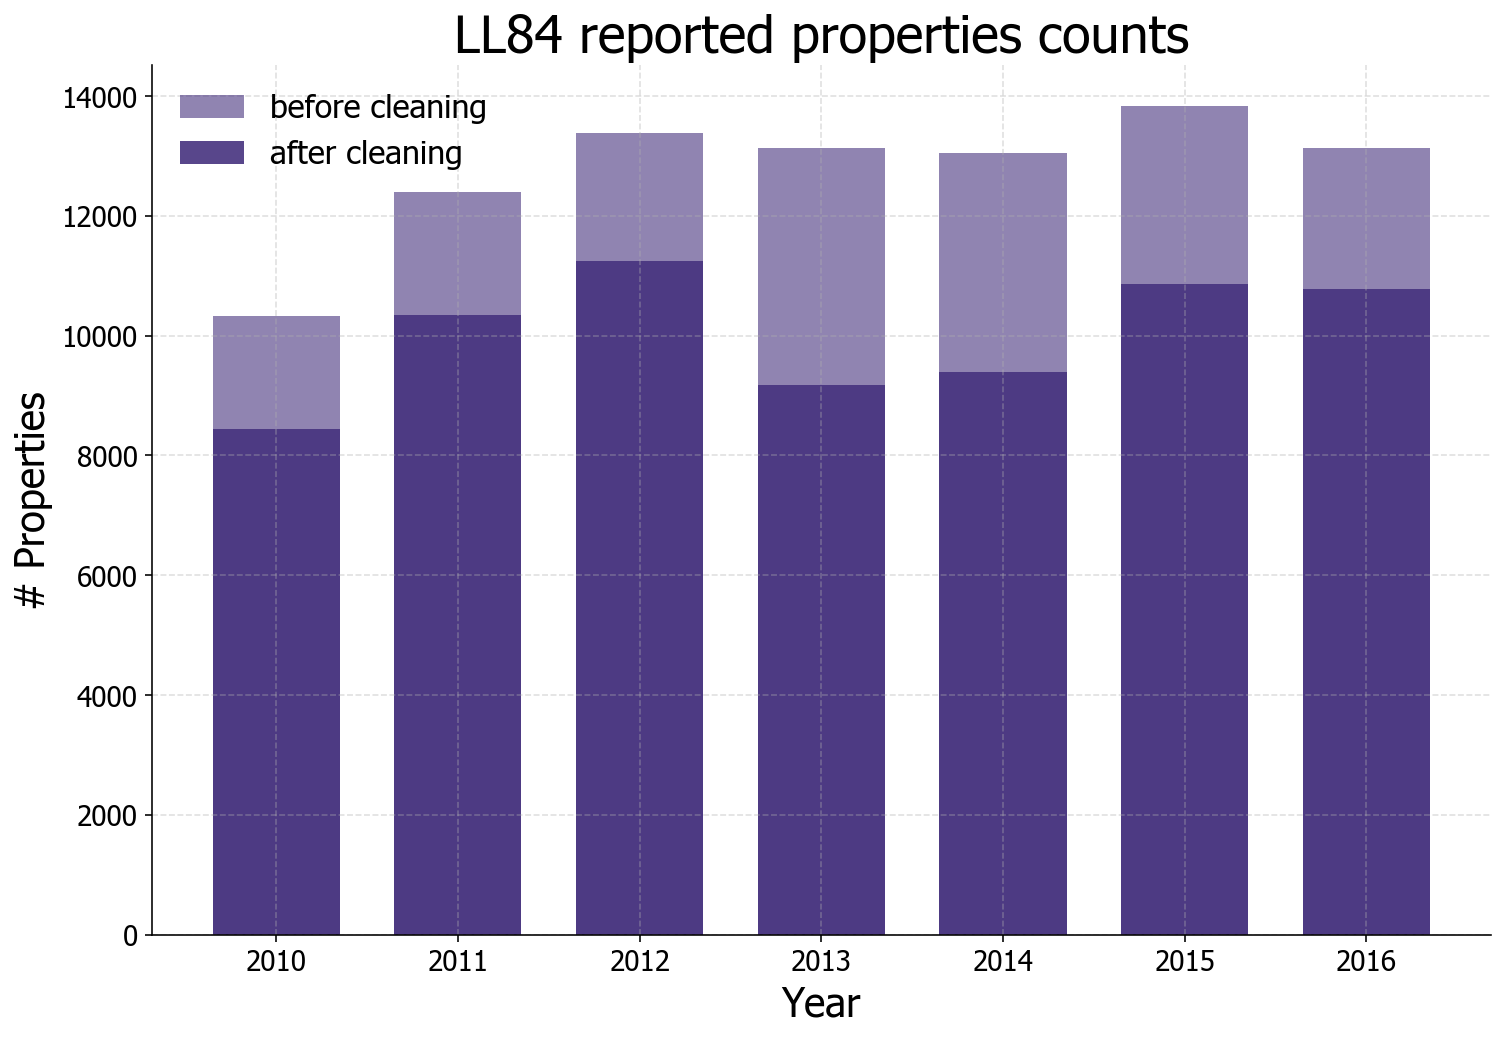

In [27]:
plt.bar(range(2010, 2017), reported, width=0.7,color=sns.color_palette("viridis")[0], alpha=0.6, label='before cleaning')
plt.bar(range(2010, 2017), clean, width=0.7,color=sns.color_palette("viridis")[0], alpha=0.9, label='after cleaning')
plt.grid(ls='--',alpha=0.4)
plt.xlabel('Year', size=20)
plt.ylabel('# Properties', size=20)
plt.title('LL84 reported properties counts', size=26)
plt.legend()
plt.show()